# Avocado Project
Project Description
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.
Some relevant columns in the dataset:
•	Date - The date of the observation
•	AveragePrice - the average price of a single avocado
•	type - conventional or organic
•	year - the year
•	Region - the city or region of the observation
•	Total Volume - Total number of avocados sold
•	4046 - Total number of avocados with PLU 4046 sold
•	4225 - Total number of avocados with PLU 4225 sold
•	4770 - Total number of avocados with PLU 4770 sold

Inspiration /Label 
The dataset can be seen in two angles to find the region and find the average price .

Task: 
One of Classification and other of Regression

In [100]:
#Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import plotly.express as px
import statsmodels.api as sm
from statsmodels.graphics.gofplots import ProbPlot
from scipy import stats
import os
from sklearn import metrics
import warnings

In [2]:
df = pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2/4/2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,1/28/2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,1/21/2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,1/14/2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Explorative analysis

In [3]:
df.shape

(18249, 14)

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

# Pre-processing the data

1. Drop the column "Unnamed: 0".  it only has index values.
2. Create dummy variables for "Type" column
3. Use of label encoder for "region" column to convert it into numerical variables
4. Renaming column 4046,4225,4770 for proper understanding

In [6]:
#Remove unwanted coulumn - Unnamed
df.drop('Unnamed: 0', inplace=True, axis=1)

In [7]:
# Checking the column 'type'
df.type.unique()

array(['conventional', 'organic'], dtype=object)

In [8]:
#Creating dummy variables for type column
df = pd.get_dummies(df, columns=['type'],drop_first=True)

In [9]:
#renaming columns for proper understanding
df.rename(columns={'4046':'Small size sold',
                          '4225':'Large size sold',
                          '4770':'XLarge size sold'}, 
                 inplace=True)

In [16]:
#label encode "region" column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['region'] = le.fit_transform(df['region'])

In [18]:
#checking the contents of region column
df.region.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [17]:
df.head()

,Date,AveragePrice,Total Volume,Small size sold,Large size sold,XLarge size sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_organic
0,12/27/2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,0
1,12/20/2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,0
2,12/13/2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,0
3,12/6/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,0
4,11/29/2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,0


In [12]:
#To find the missing value & their percentages
def missing_data(data):
    percentage_missing = data.isnull().sum()*100/len(data)
    data_types= data.dtypes
    missing_values = pd.DataFrame({"data_types": data_types,
                                  "%_missing": percentage_missing})
    return missing_values
missing_data(df)

,data_types,%_missing
Date,object,0.0
AveragePrice,float64,0.0
Total Volume,float64,0.0
Small size sold,float64,0.0
Large size sold,float64,0.0
XLarge size sold,float64,0.0
Total Bags,float64,0.0
Small Bags,float64,0.0
Large Bags,float64,0.0
XLarge Bags,float64,0.0


<Axes: >

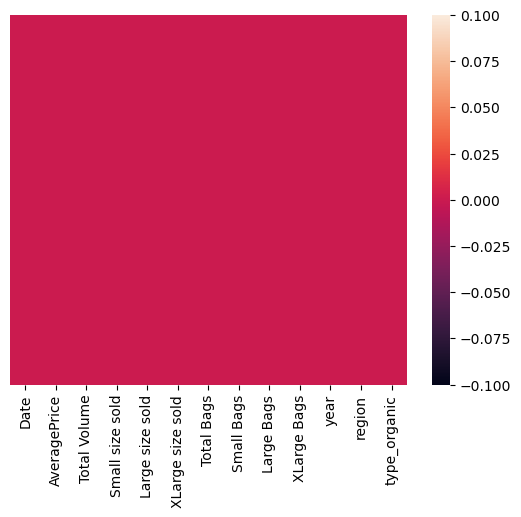

In [13]:
#Visualizing the missing or null value in the dataset
sns.heatmap(df.isnull(), yticklabels=False)

<Axes: >

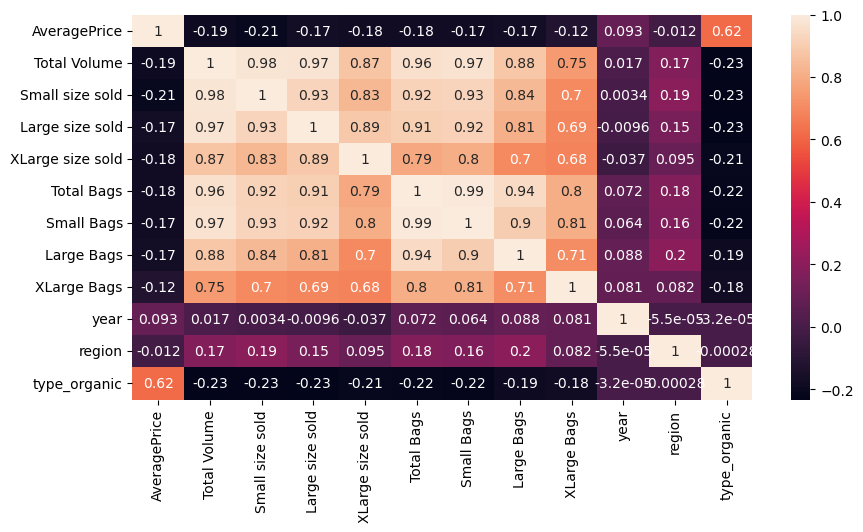

In [30]:
# cor_mat=df.corr()
fig = plt.figure(figsize=(10,5))
sns.heatmap(cor_mat,annot=True)

Average Price seems to be highly correlated with Avocado types and slightly with year.

# Data Analysis

<Axes: >

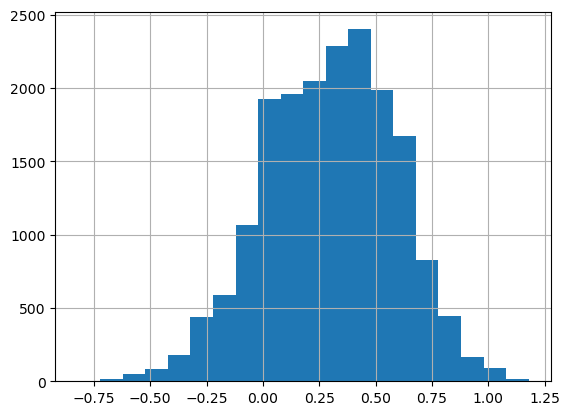

In [31]:
# The distribution of Average Price in histgram
df['AveragePrice']= np.log(df['AveragePrice'])
df['AveragePrice'].hist(bins=20)

1. Type of avocado vs Average price

<Axes: xlabel='type_organic', ylabel='AveragePrice'>

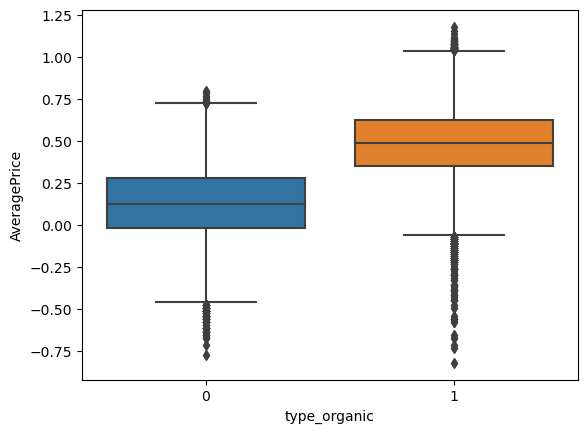

In [32]:
sns.boxplot(x="type_organic", y="AveragePrice", data=df)

It could be seen that Organic avocados are more expensive than conventional ones.

2. Average price of Avocado over the years

<Axes: xlabel='year', ylabel='AveragePrice'>

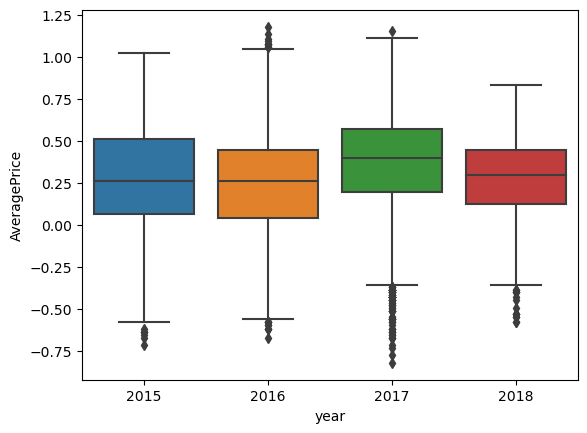

In [33]:
sns.boxplot(x="year", y="AveragePrice", data=df)

The average price was highest in 2017 compared to other years

3.  Average price across regions

<Axes: xlabel='region'>

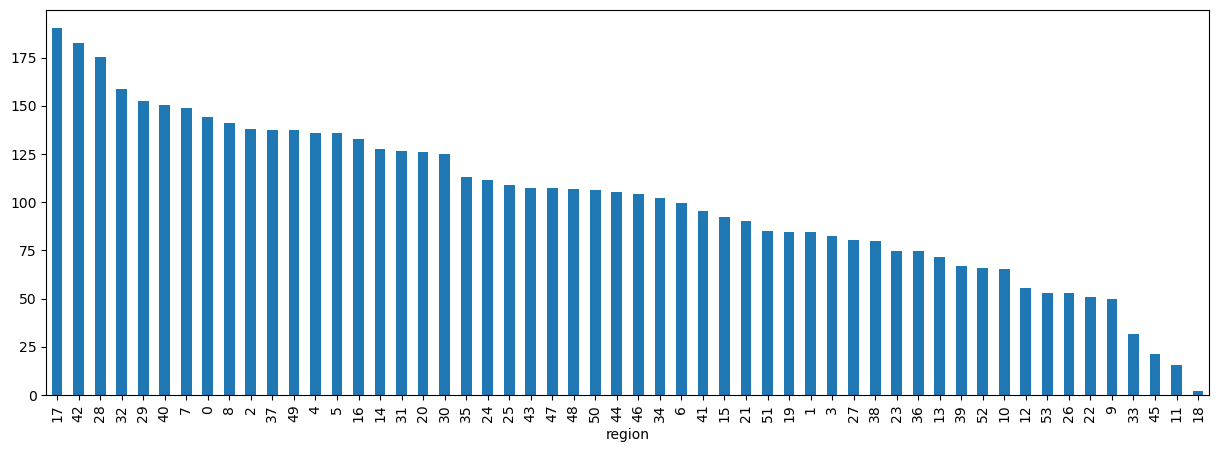

In [34]:
df.groupby("region")["AveragePrice"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(15,5))

Observation:
AveragePrice varies with region.

# Predicting Average Price of Avocado
1. Model 1 - few variables

In [44]:
#Creating a new dataframe with few columns only and create train and test data
df_new=df[["AveragePrice","Total Volume","region","type_organic","Total Bags","year"]]

X=df_new[["Total Volume","region","type_organic","Total Bags","year"]] #feature columns
y=df_new.AveragePrice #predictor variable

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (14599, 5)
Y Train Shape  (14599,)
X Test Shape  (3650, 5)
Y Test Shape  (3650,)


In [46]:
# using new dataframe(df_new) features
model1 = sm.OLS(y, X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           AveragePrice   R-squared (uncentered):                   0.703
Model:                            OLS   Adj. R-squared (uncentered):              0.703
Method:                 Least Squares   F-statistic:                              8632.
Date:                Sun, 22 Oct 2023   Prob (F-statistic):                        0.00
Time:                        16:09:22   Log-Likelihood:                          1153.5
No. Observations:               18249   AIC:                                     -2297.
Df Residuals:                   18244   BIC:                                     -2258.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Total Volume -1.271e-08   1.82e-09     -7.000      0.000   -1.63e-08   -9.15e-09
region          -0.0002      0.000     -1.710      0.087      -0.000    2.74e-05
type_organic     0.3492      0.003    100.871      0.000       0.342       0.356
Total Bags    2.819e-08   6.34e-09      4.450      0.000    1.58e-08    4.06e-08
year          6.648e-05   1.85e-06     35.893      0.000    6.28e-05    7.01e-05
==============================================================================
Omnibus:                      628.692   Durbin-Watson:                   0.332
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              869.916
Skew:                          -0.364   Prob(JB):                    1.26e-189
Kurtosis:                       3.783   Cond. No.                     7.60e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 7.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

2. Model 2 - Add few more variables

In [48]:
#Creating a new dataframe with few columns only and create train and test data
df1_new=df[["AveragePrice","Total Volume","region","Small size sold","Large size sold","XLarge size sold", "Total Bags", "Small Bags","Large Bags","XLarge Bags", "year", "region","type_organic"]]

X=df1_new[["Total Volume","region","Small size sold","Large size sold","XLarge size sold", "Total Bags", "Small Bags","Large Bags","XLarge Bags", "year", "region","type_organic"]] #feature columns
y=df1_new.AveragePrice #predictor variable


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

print("X Train Shape ",X_train.shape)
print("Y Train Shape ",y_train.shape)

print("X Test Shape ",X_test.shape)
print("Y Test Shape ",y_test.shape)

X Train Shape  (14599, 14)
Y Train Shape  (14599,)
X Test Shape  (3650, 14)
Y Test Shape  (3650,)


In [49]:
# using new dataframe(df_new) features
model2 = sm.OLS(y, X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:           AveragePrice   R-squared (uncentered):                   0.716
Model:                            OLS   Adj. R-squared (uncentered):              0.715
Method:                 Least Squares   F-statistic:                              4171.
Date:                Sun, 22 Oct 2023   Prob (F-statistic):                        0.00
Time:                        16:23:54   Log-Likelihood:                          1551.6
No. Observations:               18249   AIC:                                     -3081.
Df Residuals:                   18238   BIC:                                     -2995.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Total Volume     -7.096e-06   3.34e-05     -0.212      0.832   -7.26e-05    5.84e-05
region             4.57e-05   2.73e-05      1.674      0.094   -7.81e-06    9.92e-05
region             4.57e-05   2.73e-05      1.674      0.094   -7.81e-06    9.92e-05
Small size sold   7.005e-06   3.34e-05      0.210      0.834   -5.85e-05    7.25e-05
Large size sold   7.193e-06   3.34e-05      0.215      0.830   -5.83e-05    7.27e-05
XLarge size sold  6.682e-06   3.34e-05      0.200      0.841   -5.88e-05    7.22e-05
Total Bags           0.0102      0.026      0.397      0.692      -0.040       0.061
Small Bags          -0.0102      0.026     -0.396      0.692      -0.061       0.040
Large Bags          -0.0102      0.026     -0.396      0.692      -0.061       0.040
XLarge Bags         -0.0102      0.026     -0.396      0.692      -0.061       0.040
year              6.064e-05   1.83e-06     33.057      0.000     5.7e-05    6.42e-05
region             4.57e-05   2.73e-05      1.674      0.094   -7.81e-06    9.92e-05
region             4.57e-05   2.73e-05      1.674      0.094   -7.81e-06    9.92e-05
type_organic         0.3508      0.003    103.439      0.000       0.344       0.357
==============================================================================
Omnibus:                      565.424   Durbin-Watson:                   0.353
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              813.778
Skew:                          -0.325   Prob(JB):                    1.95e-177
Kurtosis:                       3.805   Cond. No.                     1.13e+35
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The smallest eigenvalue is 2.49e-53. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Observations:
The accuracy increased with additional variables as seen in Model 2. From 70% to 71.6%

In [55]:
#Use the original DataFrame since the addition of all variables give better accuracy
#Creating X and y features from df
x = df.drop('AveragePrice', axis=1)
y = df["AveragePrice"]

In [65]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Create and Train the Linear Regression Model

In [66]:
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [67]:
#Make Predictions
y_pred = LR.predict(X_test)

In [68]:
#Evaluation of the model LR
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 0.04994652366866463
R-squared (R2) Score: 0.4018885776287937


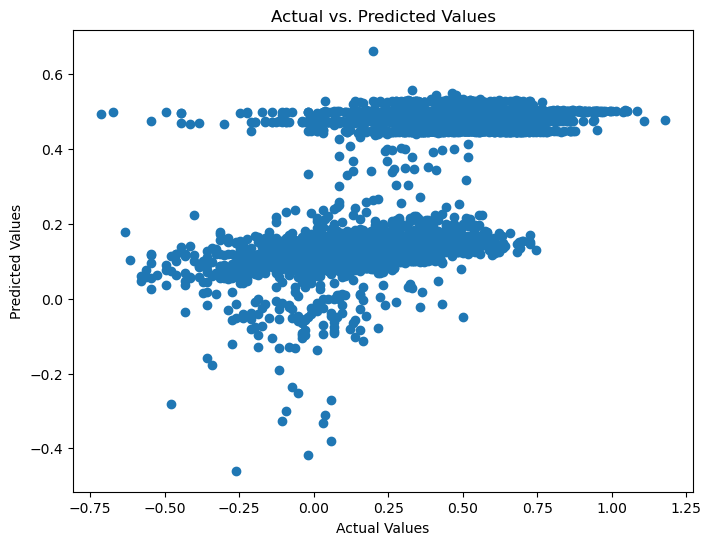

In [81]:
#Visualize the Results of LR
plt.figure(figsize=(8, 6))
plt.scatter(y_test, LR.predict(X_test))
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

Create and Train the Random Forest Regressor

In [71]:
Rf = RandomForestRegressor(n_estimators=100, random_state=42)  
Rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [72]:
#Make Predictions
y_pred = Rf.predict(X_test)

In [73]:
#Evaluation of the model Rf
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 0.011574204778573356
R-squared (R2) Score: 0.8613984803256437


Observation:
RandomForest Regressor gives a better accuracy for the prediction

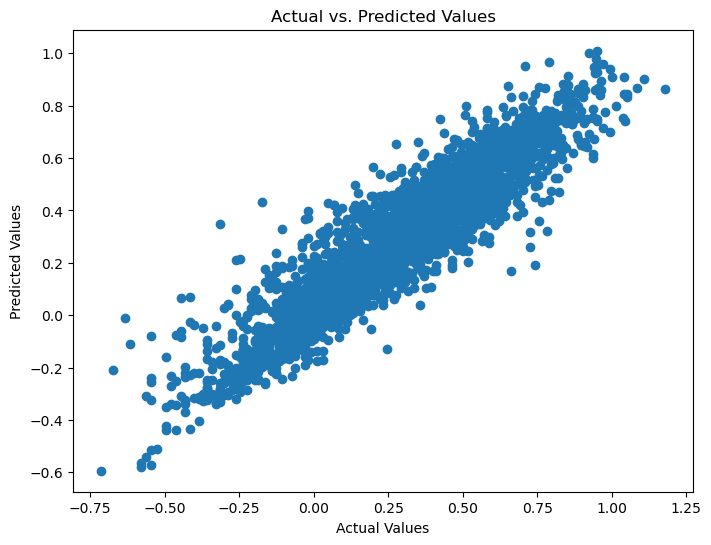

In [79]:
#Visualize the Results
plt.figure(figsize=(8, 6))
plt.scatter(y_test, Rf.predict(X_test))
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

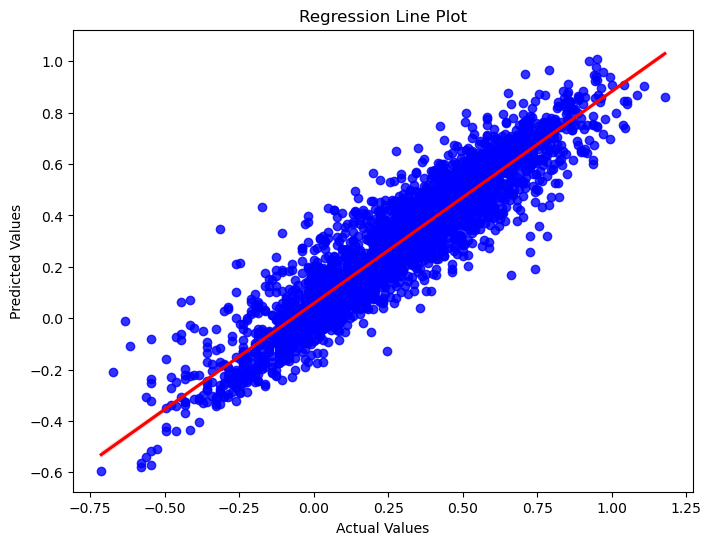

In [76]:
#Regression Line Plot
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression Line Plot")
plt.show()

In [78]:
#checking the prediction with original value
a = np.array(y_test)
df = pd.DataFrame()
df["Predicted"] = Rf.predict(X_test)
df["Original"] = a
df

,Predicted,Original
0,0.046811,-0.198451
1,-0.019654,-0.030459
2,0.339003,0.364643
3,-0.095689,-0.030459
4,0.373798,0.371564
...,...,...
3645,0.232592,0.239017
3646,0.414144,0.512824
3647,-0.510367,-0.527633
3648,0.499685,0.652325


Random forest model predicts average price of avocado better than linear model as shown above.

# Classification analysis into either conventional or organic type
The column has been encoded to numeric data type where conventional is 0 and organic is 1

In [84]:
df1_new

,AveragePrice,Total Volume,region,Small size sold,Large size sold,XLarge size sold,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,type_organic
0,0.285179,64236.62,0,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,0
1,0.300105,54876.98,0,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,0
2,-0.072571,118220.22,0,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,0
3,0.076961,78992.15,0,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,0
4,0.246860,51039.60,0,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0.488580,17074.83,53,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,53,1
18245,0.536493,13888.04,53,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,53,1
18246,0.625938,13766.76,53,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,53,1
18247,0.657520,16205.22,53,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,53,1


In [85]:
#Use the original DataFrame df1_new(copied)
#Creating X and y features from df
x = df1_new.drop('type_organic', axis=1)
y = df1_new["type_organic"]

In [86]:
# spliting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
print(x.shape, x_train.shape, y_test.shape)

(18249, 12) (14599, 12) (3650,)


Models to test for accuracy and performancy
1. Logistics regression
2. Random Forest
3. Gradient Boosting
4. Support Vector Machine
5. decision Tree

LogisticsRegression

In [91]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
predLR = LR.predict(x_test)
print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))

0.9304109589041096
[[1587  201]
 [  53 1809]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1788
           1       0.90      0.97      0.93      1862

    accuracy                           0.93      3650
   macro avg       0.93      0.93      0.93      3650
weighted avg       0.93      0.93      0.93      3650



The accuracy score of LogisticRegressio is 93.04%

 RandomForestClassifier

In [94]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
predRFC = RFC.predict(x_test)
print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test, predRFC))

0.9991780821917808
[[1788    0]
 [   3 1859]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1788
           1       1.00      1.00      1.00      1862

    accuracy                           1.00      3650
   macro avg       1.00      1.00      1.00      3650
weighted avg       1.00      1.00      1.00      3650



The accuracy score of RandomForestClassifier is 99.91%

 GradientBoostingClassifier

In [96]:
GB = GradientBoostingClassifier()
GB.fit(x_train, y_train)
predGB = GB.predict(x_test)
print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test, predGB))

0.9953424657534247
[[1785    3]
 [  14 1848]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1788
           1       1.00      0.99      1.00      1862

    accuracy                           1.00      3650
   macro avg       1.00      1.00      1.00      3650
weighted avg       1.00      1.00      1.00      3650



The accuracy score of GradientBoostingClassifier is 99.53%

SupportVectorMachineClassifier

In [98]:
svc = SVC()
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.8989041095890411
[[1519  269]
 [ 100 1762]]
              precision    recall  f1-score   support

           0       0.94      0.85      0.89      1788
           1       0.87      0.95      0.91      1862

    accuracy                           0.90      3650
   macro avg       0.90      0.90      0.90      3650
weighted avg       0.90      0.90      0.90      3650



The accuracy score of Support vector Machine Classifier is 89..89%

In [101]:
DecTree = DecisionTreeClassifier()
DecTree.fit(x_train, y_train)
predDecTree = DecTree.predict(x_test)
print(accuracy_score(y_test, predDecTree))
print(confusion_matrix(y_test, predDecTree))
print(classification_report(y_test, predDecTree))

0.9917808219178083
[[1774   14]
 [  16 1846]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1788
           1       0.99      0.99      0.99      1862

    accuracy                           0.99      3650
   macro avg       0.99      0.99      0.99      3650
weighted avg       0.99      0.99      0.99      3650



The accuracy score of DecisionTreeClassifier is 99.19%

Observation:
1. RandomForestClassifier has the highest accuracy score of 99.91% 
2. Next is GradientBoostingClassifier with accuracy score of 99.53%
3. the least accuracy score model is SupportVectorMachineClassifier with 89.89%
4. This result suggests that all the models perform maximally  but Random Forest exceeds all and to be considered for the prediction.

# Conclusion
It could be concluded that:
1. Accurate prediction of avaerage price of Avocado could be performed using Random forest Regressor over Linear Regression
2. RandomForestClassifier could predict the classification of Avocado into two major types in the dataset (ie coventional or Organic)
3. Adding more columns to the training dataset produces more accurate avaerage price prediction of Avocado